[[ 3.7511012  -1.89164106  3.574522    1.63863956  0.4279715  -2.03002718]
 [-0.59746494  3.33815156 -2.69351992 -2.65190436  3.72068954 -0.45856204]
 [-3.9209524   1.86800917 -2.79254983  1.41605971  2.94054091 -2.55102197]
 [-0.30436326 -1.22735464  3.69466352  0.35569744 -1.85067072  1.2824668 ]
 [ 2.24694298 -0.83148925 -3.84034878  3.24905078 -2.08706143 -3.29350603]
 [ 1.9392436  -1.14560289 -2.2844291   1.94108362 -0.83943687 -0.4122945 ]
 [-2.2431876  -1.15970793  0.99986553  2.68167437  0.21679347 -1.12876136]
 [-0.67280742  3.06536693  0.44525886  2.90086202  1.29086299  0.36497243]]
Generation :  0
Fitness
[ 44.32515291 -70.52534767 -42.4696006   30.27684977  51.89193761
  22.92968622  13.17501689  -8.67411076]
Best result :  51.89193761369921
Parents
[[ 2.24694298 -0.83148925 -3.84034878  3.24905078 -2.08706143 -3.29350603]
 [ 3.7511012  -1.89164106  3.574522    1.63863956  0.4279715  -2.03002718]
 [-0.30436326 -1.22735464  3.69466352  0.35569744 -1.85067072  1.2824668 ]
 [

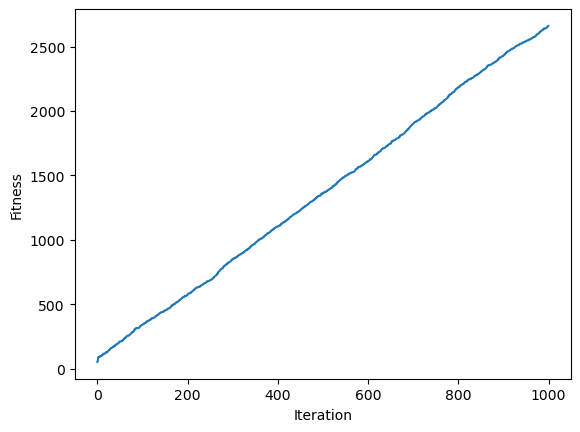

In [3]:
import numpy
import genetic

"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 8
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

"""
new_population[0, :] = [2.4,  0.7, 8, -2,   5,   1.1]
new_population[1, :] = [-0.4, 2.7, 5, -1,   7,   0.1]
new_population[2, :] = [-1,   2,   2, -3,   2,   0.9]
new_population[3, :] = [4,    7,   12, 6.1, 1.4, -4]
new_population[4, :] = [3.1,  4,   0,  2.4, 4.8,  0]
new_population[5, :] = [-2,   3,   -7, 6,   3,    3]
"""

best_outputs = []
num_generations = 1000
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = genetic.cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    
    # Selecting the best parents in the population for mating.
    parents = genetic.select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = genetic.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = genetic.mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = genetic.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()